Jared Hawkins - jmh7ax

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys


In [3]:
def regression(y, X):
    t = np.transpose(X)
    j = np.dot(t, X)
    i = np.linalg.inv(np.dot(t, X))
    w = np.dot(t, y)
    b = np.dot(i, w)
    return b

In [74]:
data = pd.read_csv('life_expectancy.csv')
df = pd.DataFrame(data)

n = len(df)
df.fillna(0)

arr = np.empty((n, 4))
arr5 = np.empty((n, 1))

df['Status'] = df['Status'].replace({'Developing': 0})
df['Status'] = df['Status'].replace({'Developed': 1})

arr1 = data['Year'].values
arr2 = data['Status'].values
arr3 = data[' BMI '].values
arr4 = data['Life expectancy '].values

arr1[np.isnan(arr1)] = 0
arr2[np.isnan(arr2)] = 0
arr3[np.isnan(arr3)] = 0
arr4[np.isnan(arr4)] = 0

mean1 = np.mean(arr1)
mean2 = np.mean(arr2)
mean3 = np.mean(arr3)
mean4 = np.mean(arr4)



np.set_printoptions(suppress=True)
np.set_printoptions(threshold=np.inf)

for x in df.index:
    arr[x, 0] = 1
    arr[x, 1] = arr1[x] 
    arr[x, 2] = arr2[x] 
    arr[x, 3] = arr3[x] 
    arr5[x, 0] = arr4[x] 
    

print(regression(arr5, arr))

[[-337.51803668]
 [   0.19793867]
 [   8.99506877]
 [   0.19996437]]


For each of your parameter estimates (each entry of βˆ) write a brief sentence or two about what it tells you about the data.

-337.51803668 is my intercept. The other betas are the slopes for the lines of best fit for the three attributes, year, status, and BMI with respect to life expectancy. The status slope is very steep (a little movement in status causes a big movement in life expectancy) while the year and BMI slopes are less than 1 (a little movement does not cause a big movement in life expectancy.

Re-run your regression model, this time with only Status and Year as X features. Plot a scatterplot of life expectancy vs. year. Color the points two different colors for developed vs. developing countries. Now use your βˆ values to plot two regression lines of life expectancy vs. year, one for developing and one for developed countries.

In [48]:
arr6 = np.empty((n, 3))
for x in df.index:
    arr6[x, 0] = 1
    arr6[x, 1] = arr1[x]
    arr6[x, 2] = arr2[x]

print(regression(arr5, arr6)) 

[[-585.82981625]
 [   0.29074408]
 [  12.36961204]]


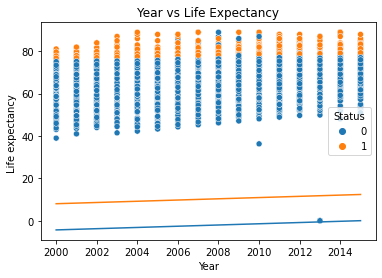

In [73]:
ax = sns.scatterplot(x = "Year", y = "Life expectancy ", hue = "Status", data = df)
ax.axis = ("equal")
ax.set_title("Year vs Life Expectancy")
x = np.linspace(2000, 2015)

ax.plot(x, 0.29074408*x -585.82981625)
ax.plot(x, 0.29074408*x + 12.36961204 -585.82981625)
#ax.plot(x, x)

plt.show()

0 = developing and 1 = developed

Using the formula for the R2 statistic from class, what is the proportion of variance explained by your two regression models above? Which model has a better (higher) R2, and can you explain why this is the case?

Model 1

In [94]:
error1 = arr5 - (0.19793867*x + 8.99506877 + 0.19996437 - 337.51803668)
r_21 = 1 - (np.linalg.norm(arr5)**2)/(np.linalg.norm(error1)**2)
print(r_21)

0.8567726509656801


Model 2

In [95]:
error2 = arr5 - (0.29074408*x + 12.36961204 - 585.82981625)
r_22 = 1 - (np.linalg.norm(arr5)**2)/(np.linalg.norm(error2)**2)
print(r_22)

0.8914398785094857


Although my regression models are probably not correct (based on line of best fit) according to the R2s there are 85.6 and 89.1 percent variance explained. This is very good, and suggests a heavy correlation between the variables. My second model is better, but I do not believe this is accurate. I would expect the first model to explain more variance because it includes BMI. Anecdotedly, this probably has a very big effect on life expectancy.